In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Final_SolarData.csv')

In [3]:
df.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2015-12-02 00:00:27,0.0,0.0,0.0,0.0,98.78,0.0,0.0,0.00,182.47,0.96,188.58,0.00,81.46,0.43,188.58,0.52,0.32,0.000,0.000,15,38.44
1,Peru,2015-12-02 00:01:40,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.01,192.18,1.01,188.51,0.01,71.66,0.38,188.51,0.52,0.32,0.007,0.000,0,38.44
2,Peru,2015-12-02 00:02:52,0.0,0.0,0.0,0.0,98.55,0.0,0.0,0.00,185.28,0.98,188.12,0.00,81.26,0.43,188.12,0.52,0.32,0.000,0.007,15,38.44
3,Peru,2015-12-02 00:04:05,0.0,0.0,0.0,0.0,98.64,0.0,0.0,0.00,175.68,0.93,188.29,0.00,87.84,0.46,188.29,0.66,0.45,0.021,0.007,0,38.44
4,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.00,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44


In [4]:
df.isnull().sum()

location                    0
date_time                   0
solarvoltage                0
solarcurrent                0
solarenergy                 0
solarpower                  0
batteryvoltage              0
batterycurrent              0
batterypower                0
load_energy1                0
load_power1                 0
load_current1               0
load_voltage1               0
load_energy2                0
load_power2                 0
load_current2               0
load_voltage2               0
inverter_input_power        0
inverter_output_power       0
inverter_input_energy       0
inverter_output_energy      0
irradiance                  0
temperature               176
dtype: int64

In [5]:
df = df.drop(['location','solarvoltage','solarcurrent','solarenergy','batteryvoltage','batterycurrent'],axis=1)

In [6]:
df = df.drop(['load_energy1','load_current1','load_voltage1','load_energy2','load_current2','load_voltage2','inverter_input_energy','inverter_output_energy','temperature'],axis=1)

In [7]:
df.head()

,date_time,solarpower,batterypower,load_power1,load_power2,inverter_input_power,inverter_output_power,irradiance
0,2015-12-02 00:00:27,0.0,0.0,182.47,81.46,0.52,0.32,15
1,2015-12-02 00:01:40,0.0,0.0,192.18,71.66,0.52,0.32,0
2,2015-12-02 00:02:52,0.0,0.0,185.28,81.26,0.52,0.32,15
3,2015-12-02 00:04:05,0.0,0.0,175.68,87.84,0.66,0.45,0
4,2015-12-02 00:05:18,0.0,0.0,188.92,78.17,0.66,0.44,0


In [8]:
type(df['date_time'])

pandas.core.series.Series

In [9]:
cols = df.columns.difference(['date_time'])
df[cols] = df[cols].astype(float)

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
df = df.resample('d', on='date_time').mean().dropna(how='all')

In [12]:
df

,solarpower,batterypower,load_power1,load_power2,inverter_input_power,inverter_output_power,irradiance
date_time,,,,,,,
2015-12-02,490.020617,393.813105,194.845197,84.116784,0.549563,0.345043,256.393654
2015-12-03,469.438565,374.348164,193.512545,85.606354,0.555576,0.354287,253.633646
2015-12-04,512.656972,417.614197,176.857504,86.902653,0.233848,0.045401,232.246946
2015-12-05,496.417617,401.917643,178.275487,88.840435,0.189913,0.000000,261.991304
2015-12-06,494.989931,399.068551,188.255549,88.679091,0.190326,0.000000,238.250429
...,...,...,...,...,...,...,...
2016-03-10,591.191644,579.851475,122.913763,64.145169,0.443881,0.245686,205.283898
2016-03-11,556.330240,549.762120,111.241974,63.678137,0.241193,0.048060,190.896996
2016-03-12,552.266975,545.076547,126.700163,63.679254,0.427009,0.231774,186.803770


In [13]:
df.head()

,solarpower,batterypower,load_power1,load_power2,inverter_input_power,inverter_output_power,irradiance
date_time,,,,,,,
2015-12-02,490.020617,393.813105,194.845197,84.116784,0.549563,0.345043,256.393654
2015-12-03,469.438565,374.348164,193.512545,85.606354,0.555576,0.354287,253.633646
2015-12-04,512.656972,417.614197,176.857504,86.902653,0.233848,0.045401,232.246946
2015-12-05,496.417617,401.917643,178.275487,88.840435,0.189913,0.000000,261.991304
2015-12-06,494.989931,399.068551,188.255549,88.679091,0.190326,0.000000,238.250429


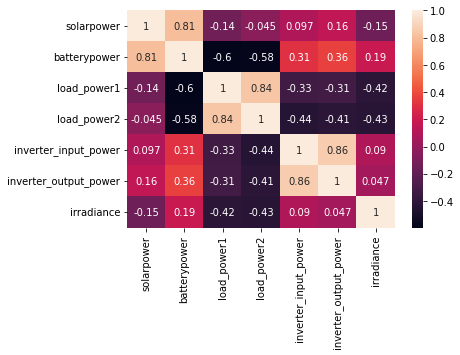

In [14]:
ax = sns.heatmap(df.corr(), annot=True)

In [15]:
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,40), dpi=200)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot( ax=axes[i],
                          title=f"{key.capitalize()}",
                          rot=30,color='red', lw=2
                        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()

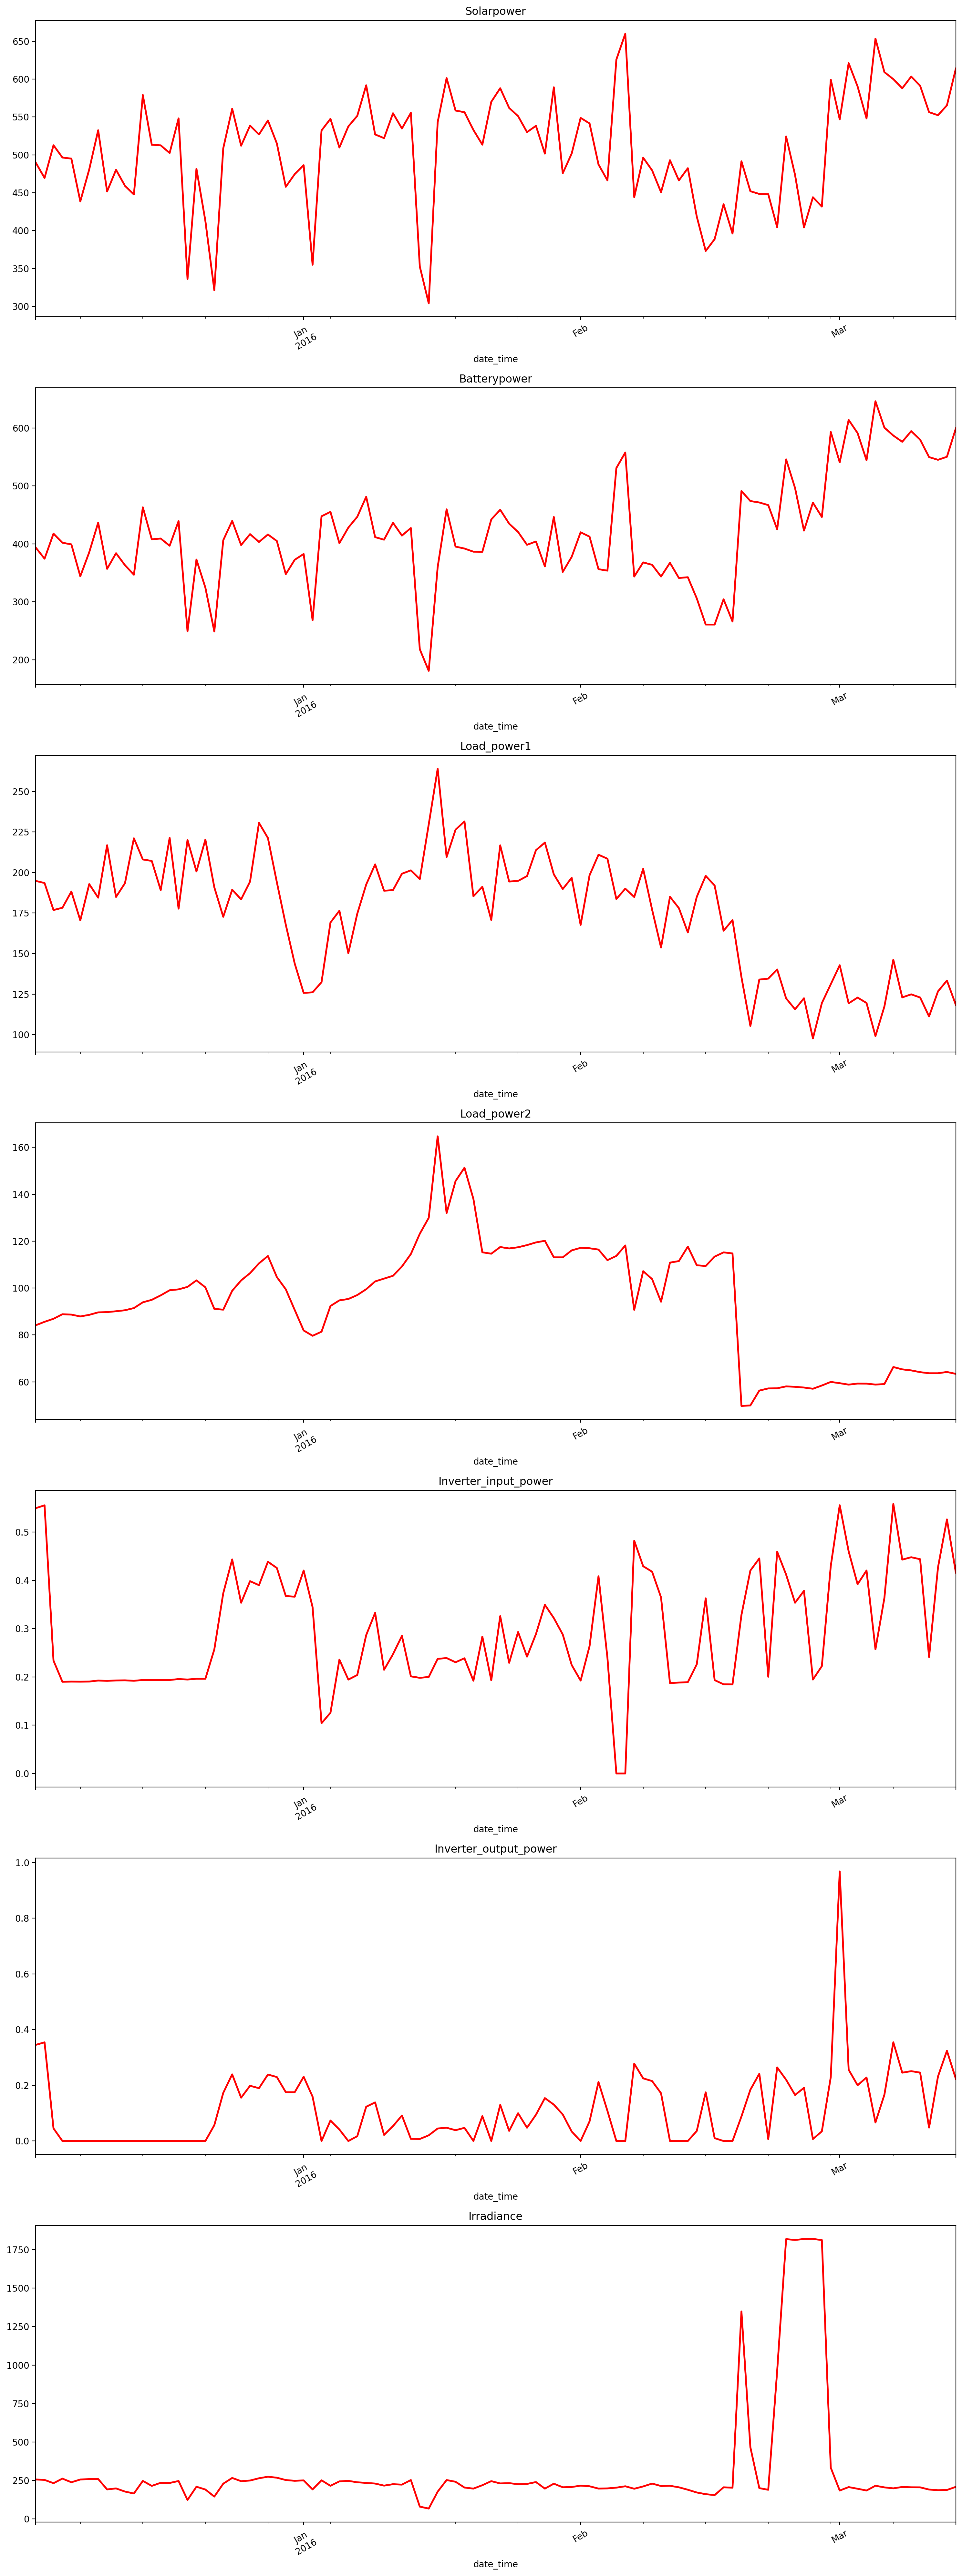

In [16]:
cols_to_plot = ["solarpower", "batterypower", "load_power1", "load_power2", "inverter_input_power", "inverter_output_power","irradiance"]
show_raw_visualization(df[cols_to_plot])

In [17]:
df.to_csv("solar_power_aggregegated.csv")

In [18]:
time_step = []
solar_power = []
battery_power = []
irradience = []
load_power1 = []
load_power2 = []
inverter_output_power = []

In [19]:
import csv
with open('/content/solar_power_aggregegated.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    solar_power.append(float(row[1]))
    battery_power.append(float(row[2]))
    irradience.append(float(row[7]))
    load_power1.append(float(row[3]))
    load_power2.append(float(row[4]))
    inverter_output_power.append(float(row[6]))
    step = step + 1


In [20]:
x = np.array([solar_power,battery_power,irradience,load_power1,load_power2])
y = np.array(inverter_output_power)
x=x.reshape(104,5)
y=y.reshape(104,1)

In [21]:
x.shape

(104, 5)

In [22]:
y.shape

(104, 1)

In [27]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(5)),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1)
                            ])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mse',optimizer='sgd')

In [30]:
model.fit(x,y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 4229328375967121408.0000
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 3404849819418624.0000
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 2896720291692544.0000
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 2464422438109184.0000
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 2096639825149952.0000
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 1783743538790400.0000
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 1517543076397056.0000
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 1291069450878976.0000
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 1098393929646080.0000
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 934472946024448.0000
Epoch 11/1000
4/4 [==============================] - 0s 3

In [47]:
model.save("solar_power_prector.h5")

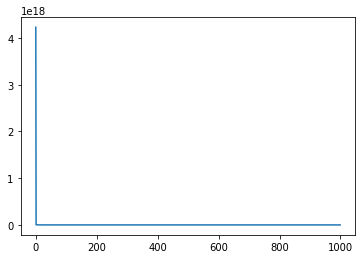

In [48]:
plt.plot(model.history.history['loss'])
plt.show()